In [116]:
from keras.layers import Input, Dense, Dropout
from keras.models import Model

In [117]:
encoding_dim = 32

In [178]:
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

In [179]:
# end-to-end reconstruction
autoencoder = Model(input_img, decoded) 

# map input to encoded representation
encoder = Model(input_img, encoded) 

# decode a representation
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [180]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_43 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_58 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_59 (Dense)             (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [181]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [182]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [183]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [184]:
autoencoder.fit(x_train, x_train,
                epochs=1000,
                batch_size=1024,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/1000
60000/60000 [==============================] - 1s 19us/step - loss: 0.5754 - val_loss: 0.3398
Epoch 2/1000
60000/60000 [==============================] - 1s 11us/step - loss: 0.2982 - val_loss: 0.2811
Epoch 3/1000
60000/60000 [==============================] - 1s 11us/step - loss: 0.2782 - val_loss: 0.2741
Epoch 4/1000
60000/60000 [==============================] - 1s 11us/step - loss: 0.2729 - val_loss: 0.2701
Epoch 5/1000
60000/60000 [==============================] - 1s 11us/step - loss: 0.2690 - val_loss: 0.2661
Epoch 6/1000
60000/60000 [==============================] - 1s 11us/step - loss: 0.2648 - val_loss: 0.2616
Epoch 7/1000
60000/60000 [==============================] - 1s 11us/step - loss: 0.2600 - val_loss: 0.2563
Epoch 8/1000
60000/60000 [==============================] - 1s 11us/step - loss: 0.2545 - val_loss: 0.2506
Epoch 9/1000
60000/60000 [==============================] - 1s 11us/step - loss: 0.2488 - val_

In [185]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

In [186]:
encoded_imgs

array([[ 5.8174267 , 13.360438  ,  5.8272824 , ..., 13.491613  ,
         0.98649544,  6.984234  ],
       [ 7.018137  ,  4.988995  , 15.748765  , ...,  1.8870533 ,
         8.267157  , 13.460815  ],
       [ 4.3611937 ,  5.140359  ,  2.557168  , ...,  5.350295  ,
         6.6123705 ,  1.5952889 ],
       ...,
       [16.125048  , 20.251095  ,  7.9699326 , ..., 17.68502   ,
        12.764651  , 17.768847  ],
       [ 9.682271  , 12.909838  ,  5.1775446 , ...,  9.558591  ,
         9.002487  , 15.757061  ],
       [19.693754  , 10.905043  , 13.98598   , ..., 14.140415  ,
        27.056847  , 26.92773   ]], dtype=float32)

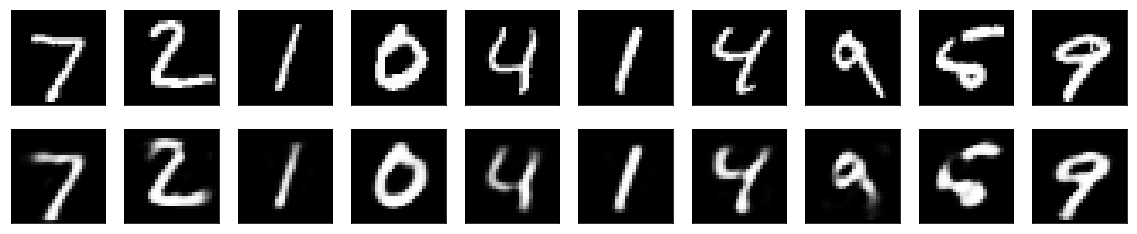

In [187]:
import matplotlib.pyplot as plt

n = 10 
plt.figure(figsize=(20, 4))
for i in range(n):
    # original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()